In [14]:
from lcls_tools.common.measurements.emittance_measurement import QuadScanEmittance
from lcls_tools.common.measurements.screen_profile import ScreenBeamProfileMeasurement
from lcls_tools.common.devices.reader import create_magnet, create_screen
from lcls_tools.common.frontend.plotting.image import plot_image_projection_fit
import epics
import matplotlib.pyplot as plt
import numpy as np


In [15]:
magnet = create_magnet('DL1', 'QE02')

screen = create_screen('DL1', 'OTR2')
print(screen)
print(magnet.controls_information.PVs)
bmax = magnet.bmax
bmin = magnet.bmin
print(screen.controls_information.PVs)
print(bmax)
scan_values = np.linspace(0,5,10) 

rmat = np.array([[[1, 2.26],
                  [0, 1]],
                 [[1, 2.26],
                  [0, 1]]])
design_twiss = {'beta_x': 1.113081026,
                'beta_y': 1.113021659,
                'alpha_x': -6.89403587e-2,
                'alpha_y': -7.029489754e-2}


name='OTR2' controls_information=ScreenControlInformation(control_name='OTRS:IN20:571', PVs=ScreenPVSet(image=<PV 'OTRS:IN20:571:Image:ArrayData': not connected>, n_col=<PV 'OTRS:IN20:571:Image:ArraySize1_RBV': not connected>, n_row=<PV 'OTRS:IN20:571:Image:ArraySize0_RBV': not connected>, n_bits=<PV 'OTRS:IN20:571:N_OF_BITS': not connected>, resolution=<PV 'OTRS:IN20:571:RESOLUTION': not connected>)) metadata=Metadata(area='DL1', beam_path=['CU_ALINE', 'CU_HTXI', 'CU_HXR', 'CU_HXTES', 'CU_SFTH', 'CU_SPEC', 'CU_SXR'], sum_l_meters=14.241, type='PROF', safe_level=None, read_tolerance=None)
bctrl=<PV 'QUAD:IN20:441:BCTRL': not connected> bact=<PV 'QUAD:IN20:441:BACT': not connected> bdes=<PV 'QUAD:IN20:441:BDES': not connected> bcon=<PV 'QUAD:IN20:441:BCON': not connected> ctrl=<PV 'QUAD:IN20:441:CTRL': not connected> bmin=<PV 'QUAD:IN20:441:BMIN': not connected> bmax=<PV 'QUAD:IN20:441:BMAX': not connected>
image=<PV 'OTRS:IN20:571:Image:ArrayData': not connected> n_col=<PV 'OTRS:IN20:5

In [16]:
beam_measurement = ScreenBeamProfileMeasurement(device = screen)
quadscanemit = QuadScanEmittance(magnet=magnet, rmat = rmat, design_twiss=design_twiss,  energy= 1e6, scan_values= scan_values, beamsize_measurement= beam_measurement)

In [21]:

epics.caget('QUAD:IN20:425:BCTRL')


cannot connect to QUAD:IN20:425:BCTRL


In [ ]:
res = beam_measurement.measure()

raw_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) processed_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) rms_sizes=array([[ 75.10237843, 512.58645727]]) centroids=array([[695.43307615, 517.62266731]]) total_intensities=array([22915.]) metadata={'name': 'beam_profile', 'save_data': True, 'save_location': None, 'device': {'name': 'OTR2', 'controls_information': {'control_name': 'OTRS:IN20:571', 'PVs': {'image': <PV 'OTRS:IN20:571:Image:ArrayData', count=1447680/1447680, type=time_double, access=read/write>, 'n_col': <PV 'OTRS:IN20:571:Image:ArraySize1_RBV', count=1, type=tim

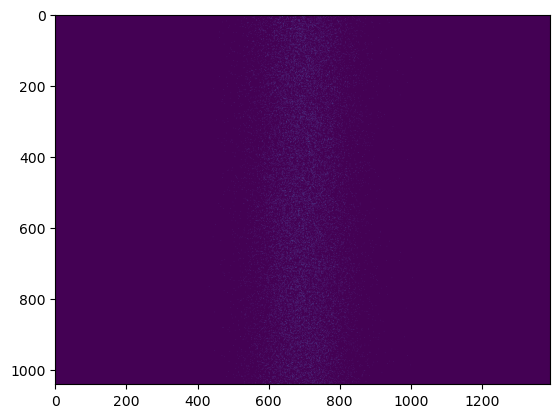

In [ ]:

# i don't think beam_meaurement.measure() is working in particular the image processing.
img = res.processed_images[0]
plt.imshow(img)
print(res)
#plot_image_projection_fit(res)


(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

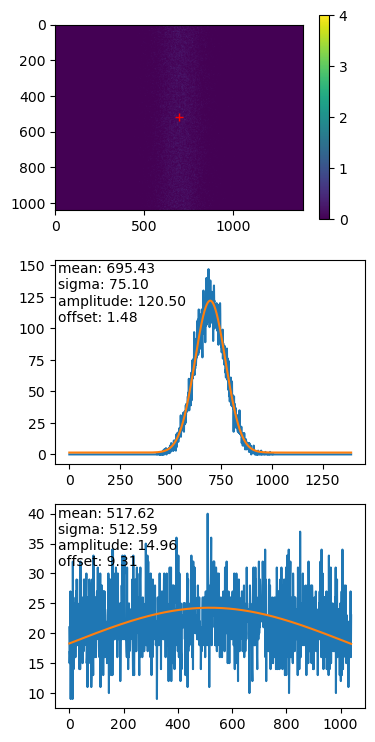

In [ ]:
res2 = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(res2)

In [ ]:
#screen.image

beam_measurement.device.image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
res = quadscanemit.measure()

/Users/cgarnier/anaconda3/envs/cheetah_simulation/lib/python3.9/site-packages/lcls_tools/common/data/model_general_calcs.py:149: RuntimeWarning: divide by zero encountered in divide
  np.nan_to_num(1.0 / sqrt_k) * np.sin(sqrt_k * q_len) * (k > 0)
/Users/cgarnier/anaconda3/envs/cheetah_simulation/lib/python3.9/site-packages/lcls_tools/common/data/model_general_calcs.py:150: RuntimeWarning: divide by zero encountered in divide
  + np.nan_to_num(1.0 / sqrt_k) * np.sinh(sqrt_k * q_len) * (k < 0)
/Users/cgarnier/anaconda3/envs/cheetah_simulation/lib/python3.9/site-packages/lcls_tools/common/data/model_general_calcs.py:149: RuntimeWarning: divide by zero encountered in divide
  np.nan_to_num(1.0 / sqrt_k) * np.sin(sqrt_k * q_len) * (k > 0)
/Users/cgarnier/anaconda3/envs/cheetah_simulation/lib/python3.9/site-packages/lcls_tools/common/data/model_general_calcs.py:150: RuntimeWarning: divide by zero encountered in divide
  + np.nan_to_num(1.0 / sqrt_k) * np.sinh(sqrt_k * q_len) * (k < 0)


In [ ]:
print(res)

quadrupole_focusing_strengths=[array([   0.        ,  154.21422737,  308.42845473,  462.6426821 ,
        616.85690947,  771.07113683,  925.2853642 , 1079.49959156,
       1233.71381893, 1387.9280463 ]), array([   -0.        ,  -154.21422737,  -308.42845473,  -462.6426821 ,
        -616.85690947,  -771.07113683,  -925.2853642 , -1079.49959156,
       -1233.71381893, -1387.9280463 ])] quadrupole_pv_values=[array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]), array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])] emittance=array([[0.00772438],
       [0.00049383]]) bmag=[array([84.26750216, 16.53986957, 38.10480224, 68.07688977, 81.99272634,
       81.03188592, 74.7179258 , 72.22696605, 78.92089413, 95.81871627]), array([  809.9693207 ,  1671.78490848,  2776.80025503,  3981.00931468,
        5076.00798133,  5839.82165223,  615

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: xlabel='Quadrupole Strength [T/m]', ylabel='Beam size [um]'>,
        <Axes: xlabel='Quadrupole Strength [T/m]', ylabel='bmag'>],
       dtype=object))

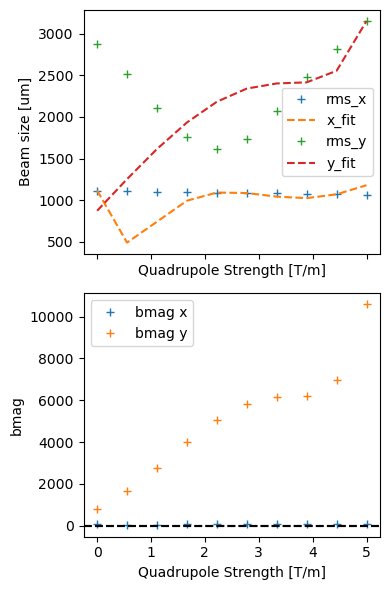

In [ ]:
from lcls_tools.common.frontend.plotting.emittance import plot_quad_scan_result
plot_quad_scan_result(res)

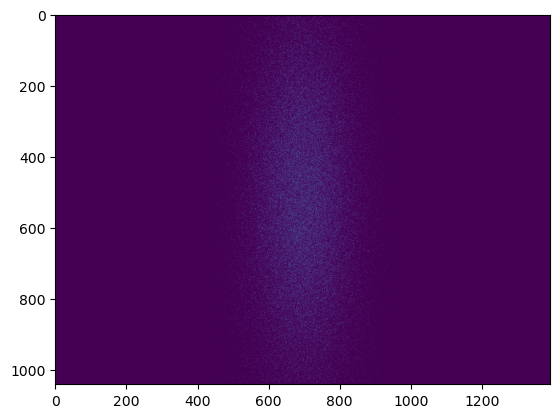

In [ ]:
plt.imshow(screen.image)

(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

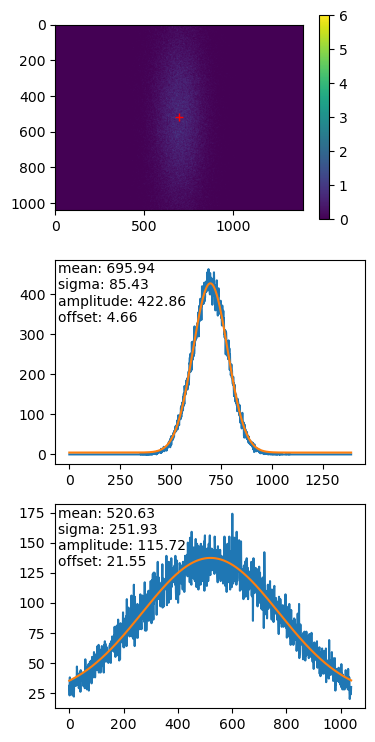

CAC: error = "Network is unreachable" sending UDP msg to 10.0.0.255:5064
CAC: ok sending UDP msg to 10.0.0.255:5064
CAC: error = "Network is unreachable" sending UDP msg to 10.0.0.255:5064
Unexpected problem with CA circuit to server "10.0.0.35:5064" was "Operation timed out" - disconnecting
CAC: ok sending UDP msg to 10.0.0.255:5064


In [ ]:
res2 = beam_measurement.beam_fit.fit_image(screen.image)
plot_image_projection_fit(res2)